In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #  data visualisation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tvmarketing/tvmarketing.csv


In [2]:
# Importing the dataset
dataset = pd.read_csv("../input/tvmarketing/tvmarketing.csv")
x = dataset.iloc[:, :-1] # Extracting features except last colum
y = dataset.iloc[:,-1]  # Extracting last column as dependent feature

In [3]:
print(x)
print(y)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [4]:
# check the null values
dataset.isnull().sum()

TV       0
Sales    0
dtype: int64

In [5]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [6]:
print(x_train)
print(x_test)
print(y_train)
print(x_test)


        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]
        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64
        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7


In [7]:
# Training the simple linear regression model on the training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
# predicting the test set result
y_pred = regressor.predict(x_test)

In [9]:
y_pred

array([10.47623281,  9.59288325, 11.45159795, 20.62095042, 15.12301956,
        9.87813155,  7.69276154, 18.33896406,  8.38747917, 16.383633  ,
       19.3143292 , 11.30437303, 14.49731363, 15.93275666, 10.8074889 ,
       12.82263008, 19.51216269,  7.32469923, 10.72927566, 17.11055607,
       20.52433406, 13.74738665, 15.34845773, 13.35171966,  9.75391052,
       12.95605267, 14.91138373, 16.72409064, 17.59823864,  8.44728929,
       10.41182191, 16.44344313, 20.20688032, 18.41257652,  7.8997966 ,
        8.15283944, 10.03455803, 15.61070213, 10.43942658,  8.44268851])

In [10]:
#Finding the predicted values of Y
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

In [11]:
from sklearn.metrics import r2_score
#Calculating the metric for training and testing dataset
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.5884742462828709
0.6763151577939721


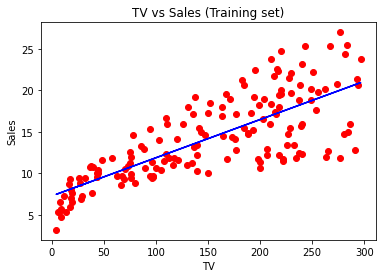

In [12]:
# visualising the training set result 
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('TV vs Sales (Training set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

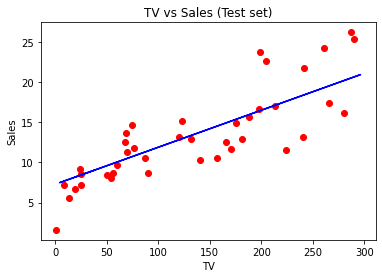

In [13]:
# visualising the test set result 
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('TV vs Sales (Test set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()